In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import classification_report

In [2]:
# path of the file
filepath = "D:\CYBER ATTACK DETECTION PROJECT\DATASET\\Final Dataset for comparision.csv"

In [3]:
# loading the dataset 
df = pd.read_csv(filepath, nrows=6000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
4,2.998560,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741553 entries, 0 to 5741552
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   duration           float64
 1   orig_bytes         int64  
 2   resp_bytes         int64  
 3   missed_bytes       float64
 4   orig_pkts          float64
 5   orig_ip_bytes      float64
 6   resp_pkts          float64
 7   resp_ip_bytes      float64
 8   label              object 
 9   misses_bytes       float64
 10  proto_icmp         int64  
 11  proto_tcp          int64  
 12  proto_udp          int64  
 13  conn_state_OTH     int64  
 14  conn_state_REJ     int64  
 15  conn_state_RSTO    int64  
 16  conn_state_RSTOS0  int64  
 17  conn_state_RSTR    int64  
 18  conn_state_RSTRH   int64  
 19  conn_state_S0      int64  
 20  conn_state_S1      int64  
 21  conn_state_S2      int64  
 22  conn_state_S3      int64  
 23  conn_state_SF      int64  
 24  conn_state_SH      int64  
 25  conn_state_SHR    

In [6]:
# statistical measure on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
count,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,...,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06
mean,3.142818e-01,6.856418e+02,5.371339e+00,3.746913e-02,4.549491e+01,1.980914e+03,3.706732e-02,8.321413e+00,-9.874159e-01,3.757868e-03,...,4.598059e-05,6.391999e-05,3.831716e-06,8.134508e-01,1.114681e-05,8.534276e-06,4.279330e-04,4.321479e-03,6.966756e-06,3.483378e-07
std,5.801527e+01,8.601501e+05,4.880814e+03,2.025883e+01,3.626892e+04,1.429308e+06,8.187426e+00,5.095195e+03,6.510143e+00,6.118617e-02,...,6.780744e-03,7.994743e-03,1.957473e-03,3.895492e-01,3.338666e-03,2.921336e-03,2.068212e-02,6.559577e-02,2.639452e-03,5.902014e-04
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.328003e+04,1.744830e+09,1.166102e+07,2.027200e+04,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07,5.792000e+03,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.shape

(5741553, 26)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH',
       'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0',
       'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1',
       'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
       'conn_state_SHR'],
      dtype='object')

In [9]:
df['label'].value_counts()

Okiru                         2626257
Benign                        1827145
DDoS                          1263025
C&C                             15520
Attack                           6943
C&C-HeartBeat                    2561
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

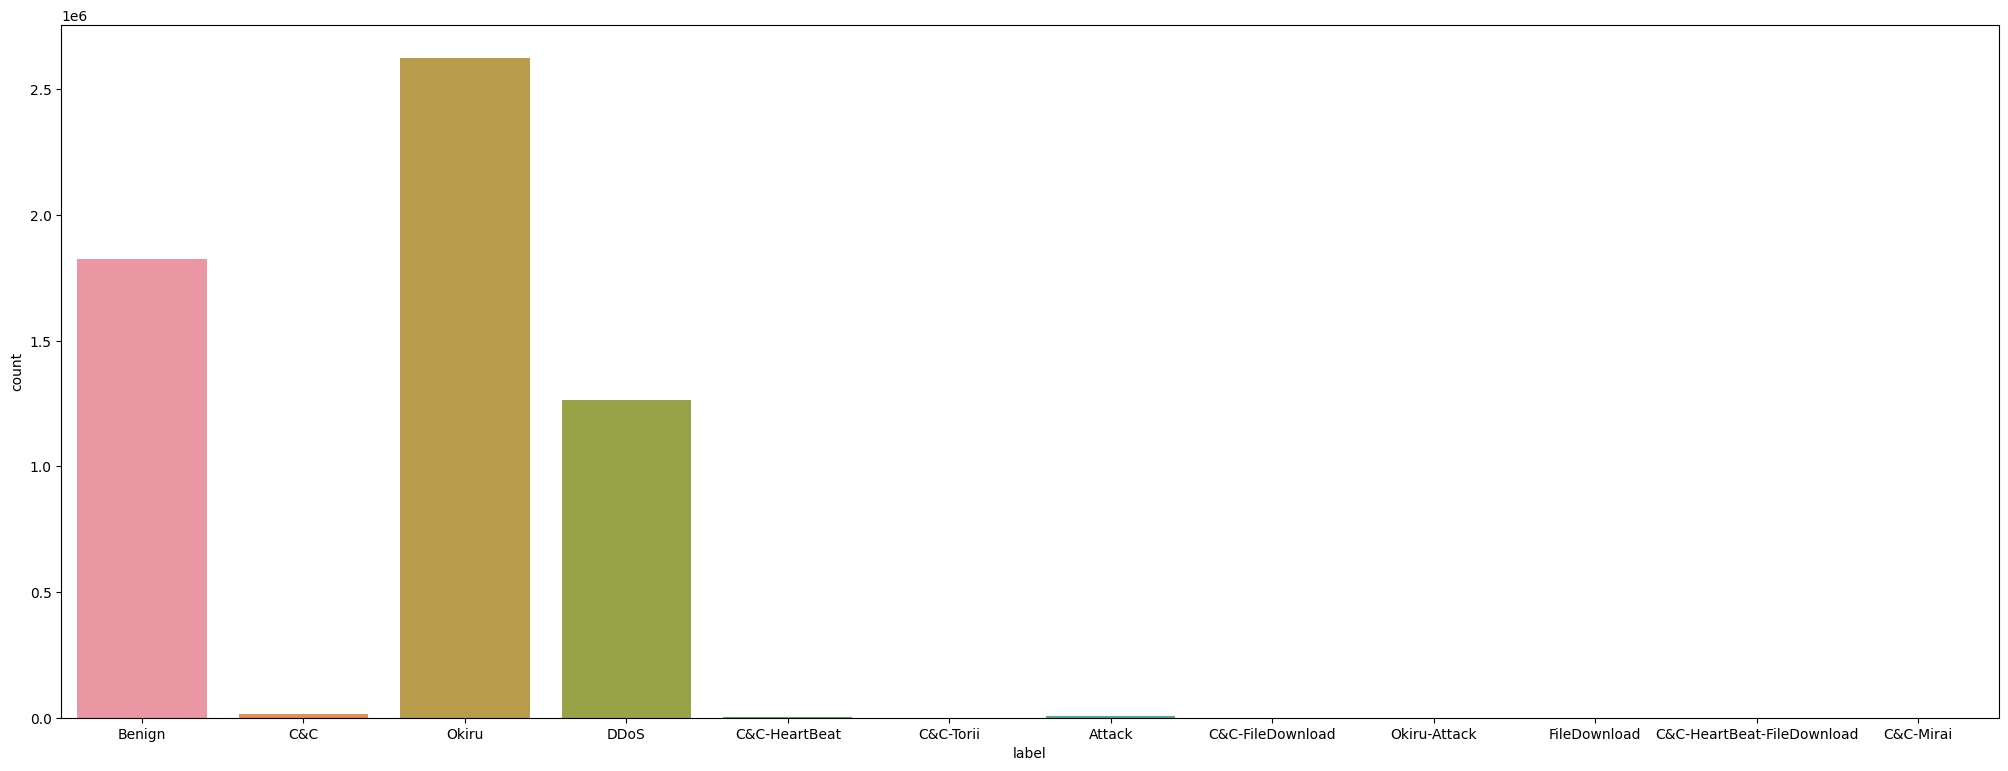

In [10]:
plt.figure(figsize= (25,9))
sns.countplot(x = df['label'])

In [11]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']

In [12]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [13]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']


In [14]:
df['label'].value_counts()

Okiru                         2626257
Benign                        1827145
DDoS                          1263025
C&C                             15520
Attack                           6943
C&C-HeartBeat                    2561
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [15]:
df['label'].value_counts()

Okiru                         2626257
Benign                        1827145
DDoS                          1263025
C&C                             15520
Attack                           6943
C&C-HeartBeat                    2561
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [16]:
df['label'].head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: label, dtype: object

## Splitting the dataset into features and target

In [17]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# target
Y = df['label']

In [18]:
# shape of features and terget

print("Shape of features : ",X.shape)
print("Shape of target : ",Y.shape)

Shape of features :  (5741553, 25)
Shape of target :  (5741553,)


In [19]:
scaler = StandardScaler()

scaler.fit(X)
X_standard = scaler.transform(X)

In [20]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
df['label'].value_counts()

Okiru                         2626257
Benign                        1827145
DDoS                          1263025
C&C                             15520
Attack                           6943
C&C-HeartBeat                    2561
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [24]:
start = time.time()
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_recall = recall_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_precision = precision_score(Y_test, rf_pred, average='macro', zero_division=1)
end = time.time()

rf_time = end - start

In [25]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)


# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred,average='macro',  zero_division=1)
dt_recall = recall_score(Y_test, dt_pred,average='macro',  zero_division=1)
dt_precision = precision_score(Y_test, dt_pred,average='macro', zero_division=1)
end = time.time()

dt_time = end - start

In [26]:
start = time.time()

ny = GaussianNB()
ny.fit(X_train, Y_train)

ny_pred = ny.predict(X_test)

ny_acc = accuracy_score(Y_test, ny_pred)
ny_f1 = f1_score(Y_test, ny_pred, average='macro', zero_division=1)
ny_recall = recall_score(Y_test, ny_pred, average='macro', zero_division=1)
ny_precision = precision_score(Y_test, ny_pred, average='macro', zero_division=1)
end = time.time()

ny_time = end - start

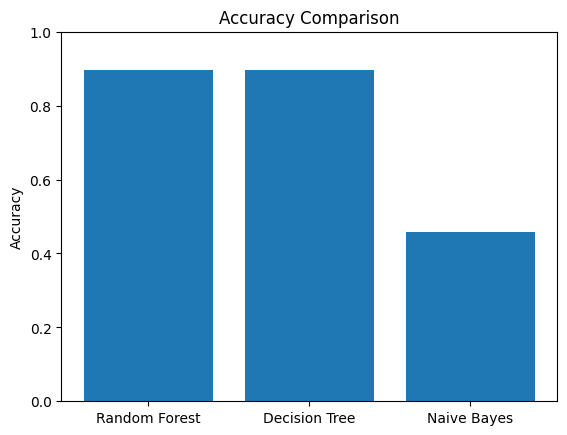

In [27]:
labels = ['Random Forest','Decision Tree', 'Naive Bayes']
accuracies = [rf_acc,dt_acc,ny_acc]
plt.bar(labels, accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

## Creating comparision table

In [28]:
# create table
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "F1 Score", "Recall", "Precision", "Time"]
# table.add_row(["SVM", svm_acc, svm_f1, svm_recall, svm_precision])
table.add_row(["Random Forest", rf_acc, rf_f1, rf_recall, rf_precision, rf_time])
table.add_row(["Decision Tree", dt_acc, dt_f1, dt_recall, dt_precision, dt_time])
table.add_row(["Navie Bayes", ny_acc, ny_f1, ny_recall, ny_precision, ny_time])

# print table
print(table)

+---------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|   Algorithm   |       Accuracy      |      F1 Score      |       Recall       |     Precision      |        Time        |
+---------------+---------------------+--------------------+--------------------+--------------------+--------------------+
| Random Forest |  0.8963024825156252 | 0.7004666690464444 | 0.7355566472302151 | 0.8404514804006532 |  288.709269285202  |
| Decision Tree |   0.89629725745029  | 0.7166160976366753 | 0.755016810997814  | 0.8460528059806165 | 29.696563005447388 |
|  Navie Bayes  | 0.45874506122470304 | 0.3482273957938432 | 0.4802090118057824 | 0.5259249743217873 | 26.12778639793396  |
+---------------+---------------------+--------------------+--------------------+--------------------+--------------------+


## Creating comparision plot graph

In [29]:
# Create comparison graph
algorithms = ['Random Forest', 'Decision Tree', 'Navie Bayes']
accuracy_scores = [rf_acc, dt_acc, ny_acc]
f1_scores = [rf_f1, dt_f1, ny_f1]
recall_scores = [rf_recall, dt_recall, ny_recall]
precision_scores = [rf_precision, dt_precision, ny_precision]
time_cost = [rf_time,dt_time,ny_time]

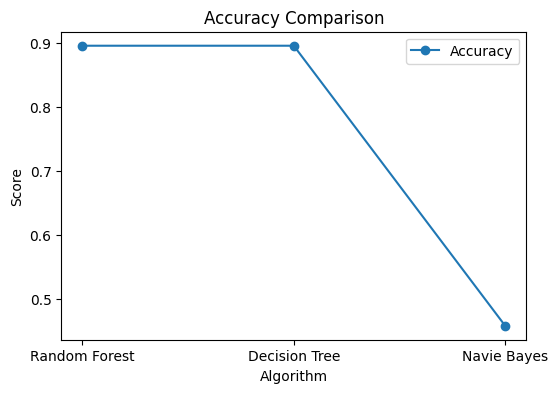

In [30]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

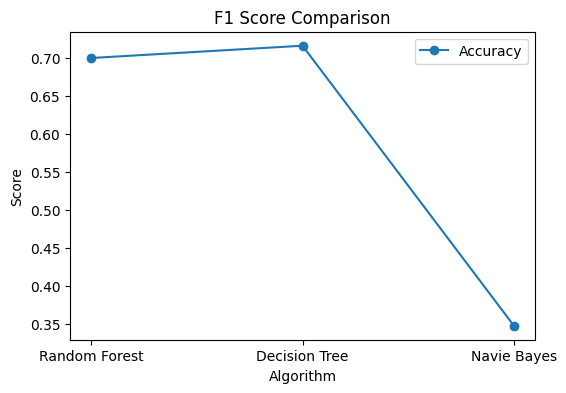

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, f1_scores, marker='o', label='Accuracy')
plt.title('F1 Score Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

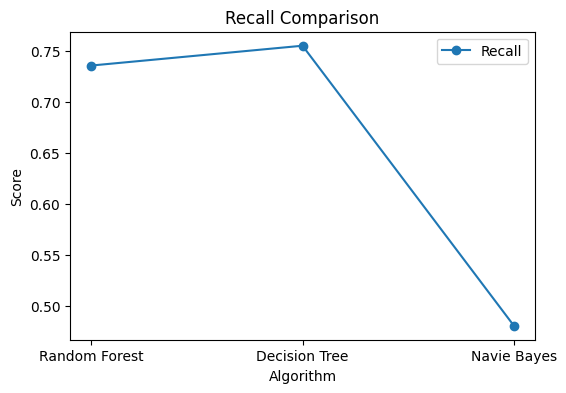

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.title('Recall Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

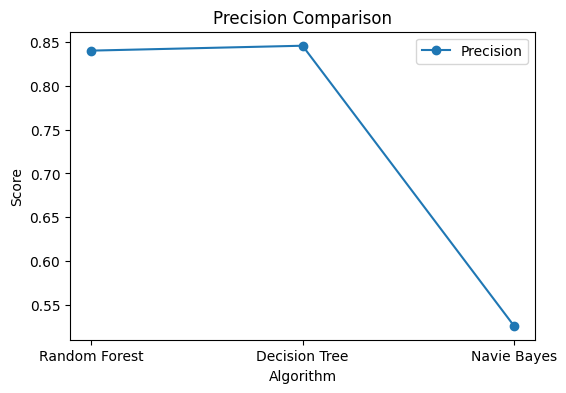

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Precision Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

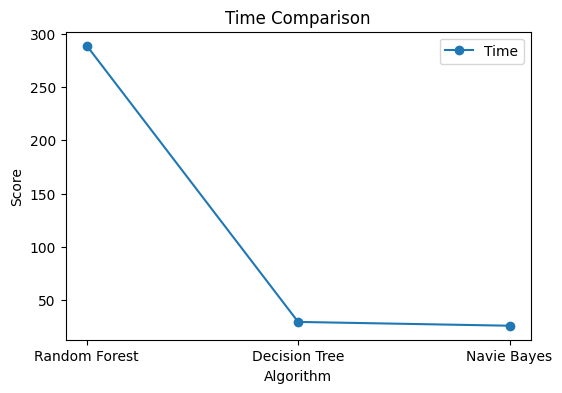

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, time_cost, marker='o', label='Time')
plt.title('Time Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

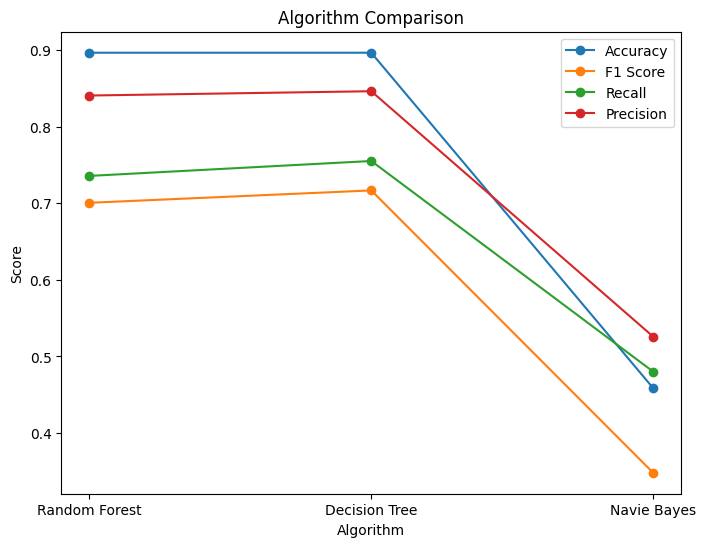

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

## Creating comparision bar graph

In [36]:
models = ['Random Forest', 'Decision Tree', 'Navie Bayes']
accuracy = [rf_acc,  dt_acc, ny_acc]
f1 = [rf_f1, dt_f1, ny_f1]
recall = [rf_recall, dt_recall, ny_recall]
precision = [rf_precision, dt_precision, ny_precision]

In [37]:
x = np.arange(len(models))
width = 0.15

In [38]:
my_list = [accuracy, f1, recall, precision]
my_array = np.array(my_list)

print(my_array.shape)

(4, 3)


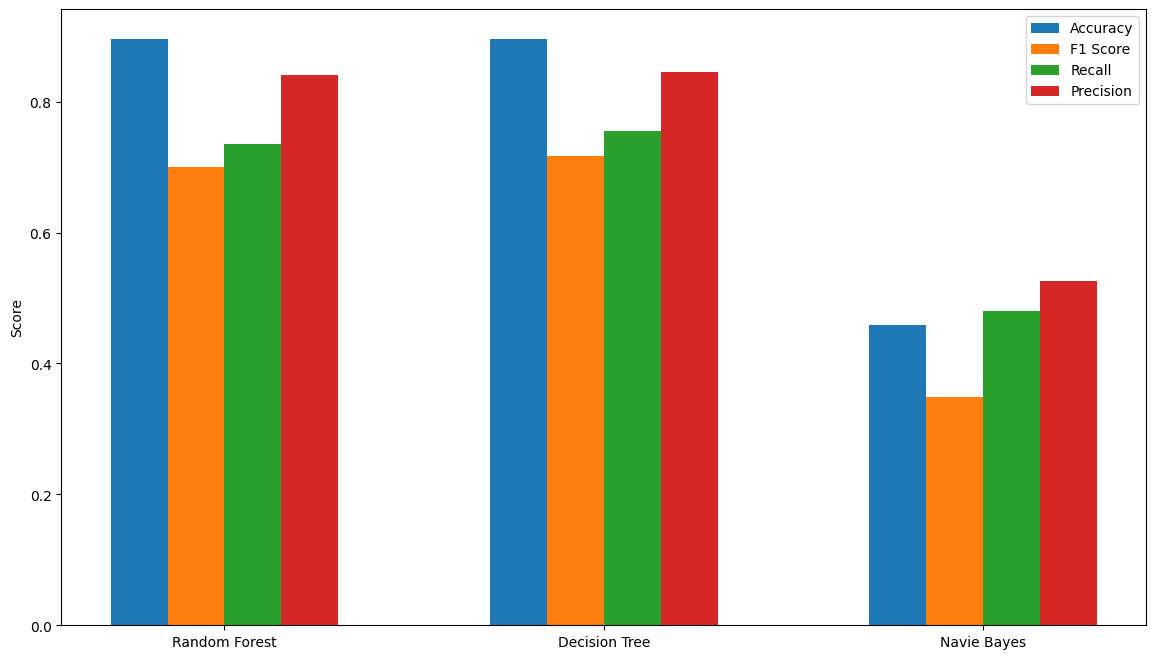

In [39]:
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, precision, width, label='Precision')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

## Classification Report

In [40]:
print('Decision Tree Classifier:')
print(classification_report(Y_test, dt_pred, zero_division=1))

Decision Tree Classifier:
                            precision    recall  f1-score   support

                    Attack       0.99      1.00      1.00      1422
                    Benign       0.99      0.82      0.90    365482
                       C&C       0.98      0.47      0.64      3167
          C&C-FileDownload       0.89      0.73      0.80        11
             C&C-HeartBeat       0.91      0.24      0.39       499
C&C-HeartBeat-FileDownload       1.00      1.00      1.00         5
                 C&C-Torii       1.00      0.43      0.60         7
                      DDoS       0.83      1.00      0.91    252572
              FileDownload       0.83      0.71      0.77         7
                     Okiru       0.88      0.90      0.89    525139
              Okiru-Attack       0.00      1.00      0.00         0

                  accuracy                           0.90   1148311
                 macro avg       0.85      0.76      0.72   1148311
              weight

In [41]:
print('Random Forest Classifier:')
print(classification_report(Y_test, rf_pred, zero_division=1))

Random Forest Classifier:
                            precision    recall  f1-score   support

                    Attack       0.99      1.00      1.00      1422
                    Benign       0.99      0.82      0.90    365482
                       C&C       0.98      0.47      0.64      3167
          C&C-FileDownload       0.83      0.91      0.87        11
             C&C-HeartBeat       0.90      0.25      0.39       499
C&C-HeartBeat-FileDownload       1.00      0.60      0.75         5
                 C&C-Torii       1.00      0.43      0.60         7
                      DDoS       0.83      1.00      0.91    252572
              FileDownload       0.83      0.71      0.77         7
                     Okiru       0.88      0.90      0.89    525139
              Okiru-Attack       0.00      1.00      0.00         0

                  accuracy                           0.90   1148311
                 macro avg       0.84      0.74      0.70   1148311
              weight

In [42]:
print('Navie Bayes Classifier:')
print(classification_report(Y_test, ny_pred, zero_division=1))

Navie Bayes Classifier:
                            precision    recall  f1-score   support

                    Attack       0.90      0.84      0.87      1422
                    Benign       0.92      0.00      0.00    365482
                       C&C       0.62      0.13      0.21      3167
          C&C-FileDownload       1.00      0.73      0.84        11
             C&C-HeartBeat       0.01      0.01      0.01       499
C&C-HeartBeat-FileDownload       0.50      1.00      0.67         5
                 C&C-Torii       0.38      0.43      0.40         7
                      DDoS       0.67      0.00      0.00    252572
              FileDownload       0.33      0.14      0.20         7
                     Okiru       0.46      1.00      0.63    525139
              Okiru-Attack       0.00      1.00      0.00         0

                  accuracy                           0.46   1148311
                 macro avg       0.53      0.48      0.35   1148311
              weighted

## Making Y_train and dt_pred same number of sample

In [43]:
print(Y_train.shape)
print(rf_pred.shape)

(4593242,)
(1148311,)


In [44]:
print(Y_train.shape)
print(dt_pred.shape)

(4593242,)
(1148311,)


In [45]:
print(Y_train.shape)
print(ny_pred.shape)

(4593242,)
(1148311,)


In [46]:
Y_train = Y_train[:rf_pred.shape[0]]
Y_train = Y_train[:dt_pred.shape[0]]
Y_train = Y_train[:ny_pred.shape[0]]


In [47]:
print(Y_train.shape)
print(rf_pred.shape)

(1148311,)
(1148311,)


In [48]:
print(Y_train.shape)
print(dt_pred.shape)

(1148311,)
(1148311,)


In [49]:
print(Y_train.shape)
print(ny_pred.shape)

(1148311,)
(1148311,)


##                                                              Confusion Matrix

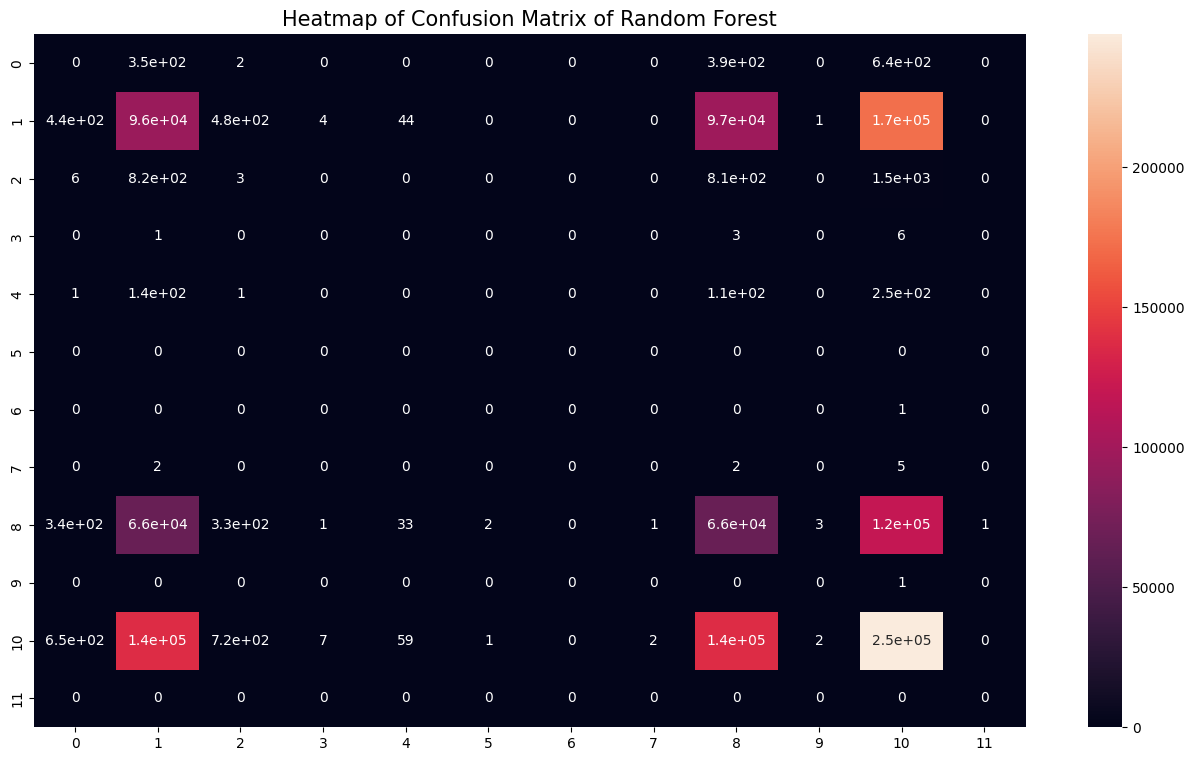

In [50]:
plt.figure(figsize = (16,9))
cm = confusion_matrix(Y_train, rf_pred)
plt.title("Heatmap of Confusion Matrix of Random Forest", fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

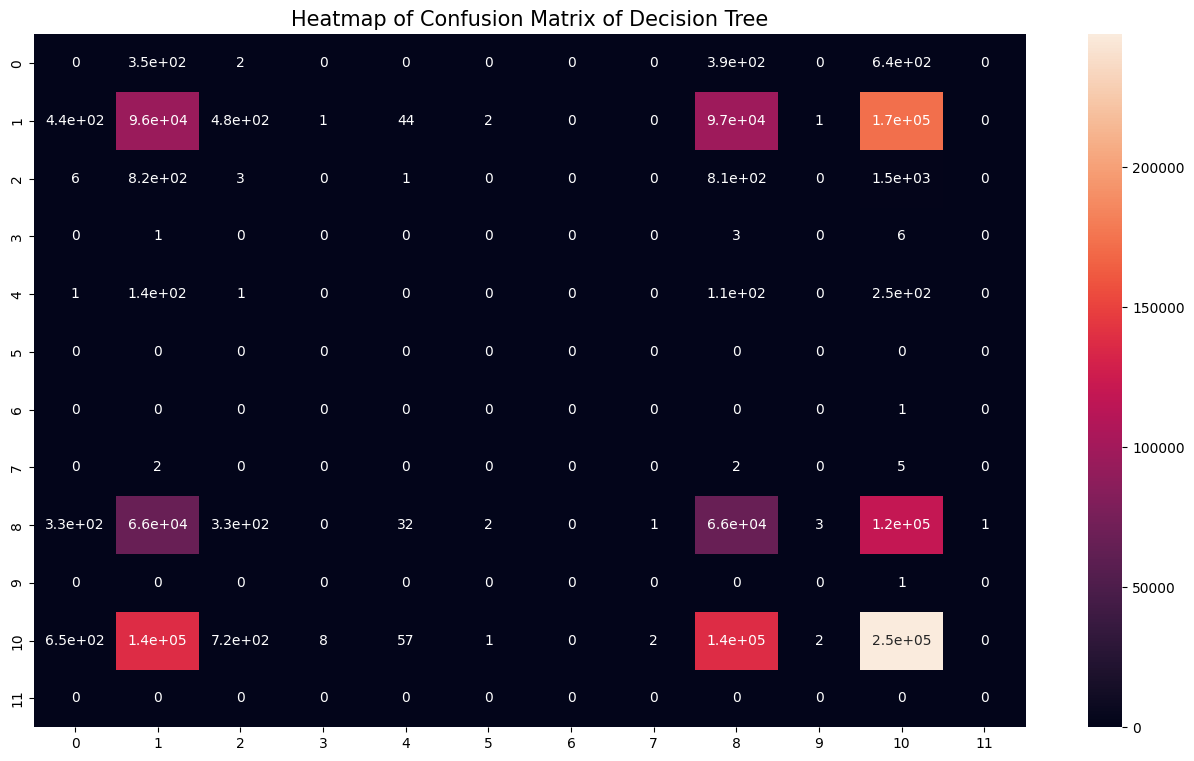

In [51]:
plt.figure(figsize = (16,9))
cm = confusion_matrix(Y_train, dt_pred)
plt.title("Heatmap of Confusion Matrix of Decision Tree", fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

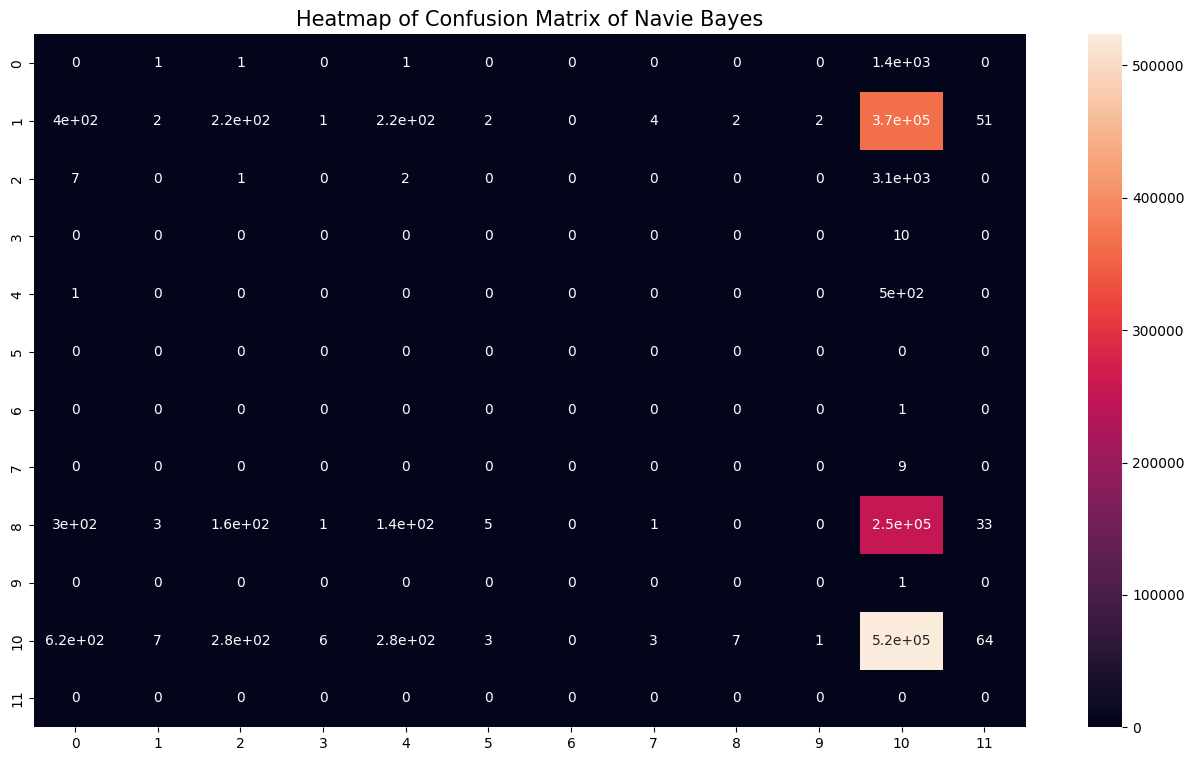

In [52]:
plt.figure(figsize = (16,9))
cm = confusion_matrix(Y_train, ny_pred)
plt.title("Heatmap of Confusion Matrix of Navie Bayes", fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()